In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
plt.rcParams.update({'font.size': 20,
                     'mathtext.fontset' : 'stix',
                     'font.family' : 'STIXGeneral'
                     })

In [146]:
# external parameters

R = 0
BN = 8
numsteps=100000
Lcte = .1
nu = .01
f0 = 1.
size = 1000 # ensemble size

N = 2**BN
dx = 1./N
Ltot = 1.
L = Lcte*Ltot
X = np.fft.fftfreq(N) * Ltot
K = np.fft.fftfreq(N) * N / Ltot
Cf = np.exp(-.5*X*X/L/L)
N2 = N//2+1
visc = 4.*np.pi*np.pi*nu

dt = .8*dx*dx/(np.pi*np.pi*nu*Ltot*Ltot)

In [147]:
taxis = np.arange(numsteps)*dt

In [148]:
# large k, short time
T_short = 1./(np.pi*np.pi*nu*N*N)
# small k (not zero), long time
T_long  = 1./(4.*np.pi*np.pi*nu)

print("T_short = {:.03e}".format(T_short))
print("dt      = {:.03e}".format(dt))
print("T_long  = {:.03f}".format(T_long))
print("T_total = {:.03f}".format(numsteps*dt))

T_short = 1.546e-04
dt      = 1.237e-04
T_long  = 2.533
T_total = 12.368


In [149]:
# correlation function of force in Fourier space
# E[g(k)g^*(k')]
# g = F[f]
def cfk_theo(x):
    return np.power(2.*np.pi,0.5)*L*np.exp(-2.*np.pi*np.pi*L*L*(K[int(x)]**2))

# correlation function of velocity field in Fourier space
# E[v(k)v^*(k')]
# v = F[u]
def cuk_theo(x):
    # this is for ornstein-uhlenbeck
    #return .5*f0/visc*cfk_theo(kx,ky,kz)
    # now for 1d heat equation
    return .5*f0*cfk_theo(K[int(x)])/visc/(K[int(x)]**2)#load velocity fields for one realization

# correlation function of zero mode of velocity field in Fourier space
# E[v(0)v^*(0)]
def cuk_zero(int_time):
    return f0*cfk_theo(0)*int_time*dt

def var_analyt(t):
    return .5*L*L/nu*(np.sqrt(1.+4.*nu*t/L/L)-1.)

def grad_var_analyt(t):
    return .5/nu*(1.-1./np.sqrt(1.+4*nu*t/L/L))

In [150]:
# lines below, verifying sums of variances of Fourier modes
# excludes Fourier modes with ki=0
var_theo  = np.sum(np.fromiter((cuk_theo(i) for i in range(1,N2)), float))
# zero mode is added separately, because it depends on time

In [151]:
var_k1 = np.zeros(numsteps)
for r in range(size):
    var_k1 += np.fromfile("data/HeatVar_1_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_k1 *= 1./size

var_kN = np.zeros(numsteps)
for r in range(size):
    var_kN += np.fromfile("data/HeatVar_N_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_kN *= 1./size

In [152]:
var_f = np.zeros(numsteps)
for r in range(size):
    var_f += np.fromfile("data/HeatVar_f_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_f *= 1./size

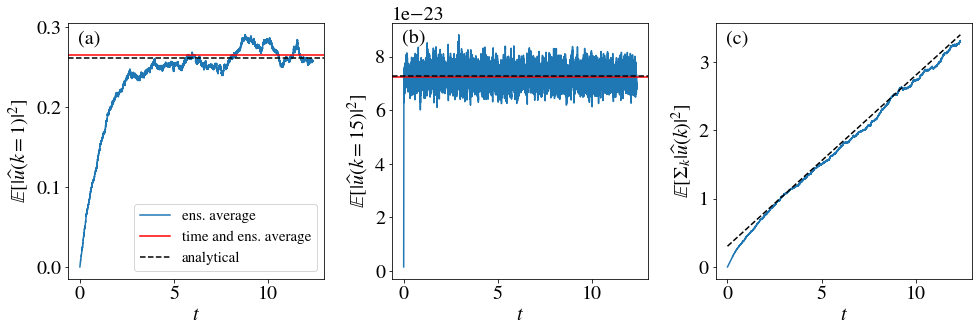

In [153]:
fig, axs = plt.subplots(1,3,figsize=(14,5))

axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$\mathbb{E}[|\widehat{u}(k=1)|^2]$')
axs[0].plot(taxis,var_k1,label='ens. average')
axs[0].axhline(np.mean(var_k1[numsteps//2:]),color='red',label='time and ens. average')
axs[0].axhline(cuk_theo(1),color='k',linestyle='dashed',label='analytical')
axs[0].text(0.04, 0.92, r'(a)', transform=axs[0].transAxes )
axs[0].legend(loc='lower right',fontsize=15)

axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\mathbb{E}[|\widehat{u}(k=15)|^2]$')
axs[1].plot(taxis,var_kN)
axs[1].axhline(np.mean(var_kN[numsteps//2:]),color='red')
axs[1].axhline(cuk_theo(15),color='k',linestyle='dashed')
axs[1].text(0.04, 0.92, r'(b)', transform=axs[1].transAxes )

axs[2].set_xlabel(r'$t$')
axs[2].set_ylabel(r'$\mathbb{E}[\Sigma_k |\widehat{u}(k)|^2]$')
axs[2].plot(taxis,var_f)
axs[2].plot(taxis,var_theo+cuk_zero(range(numsteps)),color='k',linestyle='dashed')
axs[2].text(0.04, 0.92, r'(c)', transform=axs[2].transAxes )

plt.tight_layout()
#plt.savefig("heat_1d_fourier_modes.png",facecolor='white', edgecolor='none')
plt.show()

In [154]:
var_x = np.zeros(numsteps)
for r in range(size):
    var_x += np.fromfile("data/HeatVar_x_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_x *= 1./size

var_dx = np.zeros(numsteps)
for r in range(size):
    var_dx += np.fromfile("data/HeatVar_d_R_{:04d}_N_{:02d}_NT_{:06d}_L_{:.3e}_nu_{:.3e}_f0_{:.3e}.dat".format(r,BN,numsteps,L,nu,f0),dtype=np.double)
var_dx *= 1./size

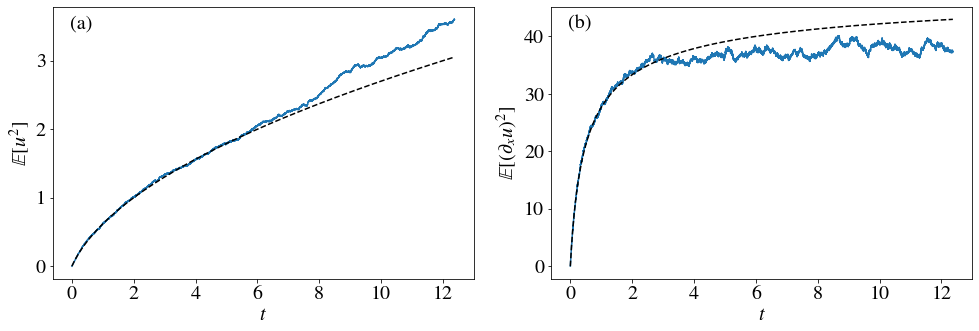

In [155]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$\mathbb{E}[u^2]$')
axs[0].plot(taxis,var_x)
axs[0].plot(taxis,var_analyt(taxis),color='k',linestyle='dashed')
axs[0].text(0.04, 0.92, r'(a)', transform=axs[0].transAxes )

axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\mathbb{E}[(\partial_x u)^2]$')
axs[1].plot(taxis,var_dx)
axs[1].plot(taxis,grad_var_analyt(taxis),color='k',linestyle='dashed')
axs[1].text(0.04, 0.92, r'(b)', transform=axs[1].transAxes )

plt.tight_layout()
#plt.savefig("heat_1d_variance.png",facecolor='white', edgecolor='none')
plt.show()